In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from utils import mean_file

In [32]:
seqs_idxs = [0]
# seqs_idxs = [1]
# seqs_idxs = [0,1]

In [33]:
if seqs_idxs==[0]: title = 'Ford'
if seqs_idxs==[1]: title = 'KITTI'
    
if seqs_idxs==[0,1]: title = '(Ford, KITTI)'
    
title = 'Scant (LiDAR) Scene q1mm ' + title

In [34]:
print(title)

Scant (LiDAR) Scene q1mm Ford


In [35]:
xlabel = 'bpp'
ylabel = 'mseF,PSNR (p2point)'
# ylabel = 'mseF,PSNR (p2plane)'

# GPCC

In [36]:
csvdir_list = ['csvfiles/lidar/gpcc/gpcc21_ford1mm.csv',
               'csvfiles/lidar/gpcc/gpcc21_kitti1mm.csv']

file_list = [csvdir_list[i] for i in seqs_idxs]
for i, f in enumerate(file_list):print(i+1, f)
df = mean_file(file_list)
x = np.array(df[xlabel])[:].round(3)
y = np.array(df[ylabel])[:].round(3)

print('x', [i for i in x])
print('y', [i for i in y])

gpcc = [x, y]

1 csvfiles/lidar/gpcc/gpcc21_ford1mm.csv
x [22.218, 19.239, 16.304, 13.402, 10.565, 7.804, 5.075, 2.652, 1.208, 0.506]
y [inf, 92.57, 87.791, 82.139, 76.213, 70.227, 64.253, 58.213, 52.282, 46.276]


#  inter

In [37]:
csvdir_list = [    
    'csvfiles/lidar/inter/ford1mm.csv',
    'csvfiles/lidar/inter/kitti1mm.csv']

file_list = [csvdir_list[i] for i in seqs_idxs]
for i, f in enumerate(file_list):print(i+1, f)
df = mean_file(file_list)

curr_ylabel = 'offset_'+ylabel

x = np.array(df[xlabel])[:].round(3)
y = np.array(df[curr_ylabel])[:].round(3)

print('x', [i for i in x])
print('y', [i for i in y])

inter = [x, y]

1 csvfiles/lidar/inter/ford1mm.csv
x [18.154, 15.258, 12.506, 9.9, 7.491, 5.313, 3.325, 1.724, 0.782, 0.334]
y [inf, 92.591, 87.8, 82.162, 76.382, 70.956, 65.46, 59.643, 53.741, 47.774]


# intra

In [38]:
csvdir_list = [    
    'csvfiles/lidar/intra/ford1mm.csv',
    'csvfiles/lidar/intra/kitti1mm.csv']

file_list = [csvdir_list[i] for i in seqs_idxs]
for i, f in enumerate(file_list):print(i+1, f)
df = mean_file(file_list)

curr_ylabel = 'offset_'+ylabel

x = np.array(df[xlabel])[:].round(3)
y = np.array(df[curr_ylabel])[:].round(3)

print('x', [i for i in x])
print('y', [i for i in y])

intra = [x, y]

1 csvfiles/lidar/intra/ford1mm.csv
x [19.281, 16.485, 13.673, 11.001, 8.485, 6.162, 3.929, 2.124, 1.013, 0.455]
y [inf, 92.581, 87.799, 82.165, 76.376, 70.929, 65.372, 59.592, 53.704, 47.672]


# RD Curve

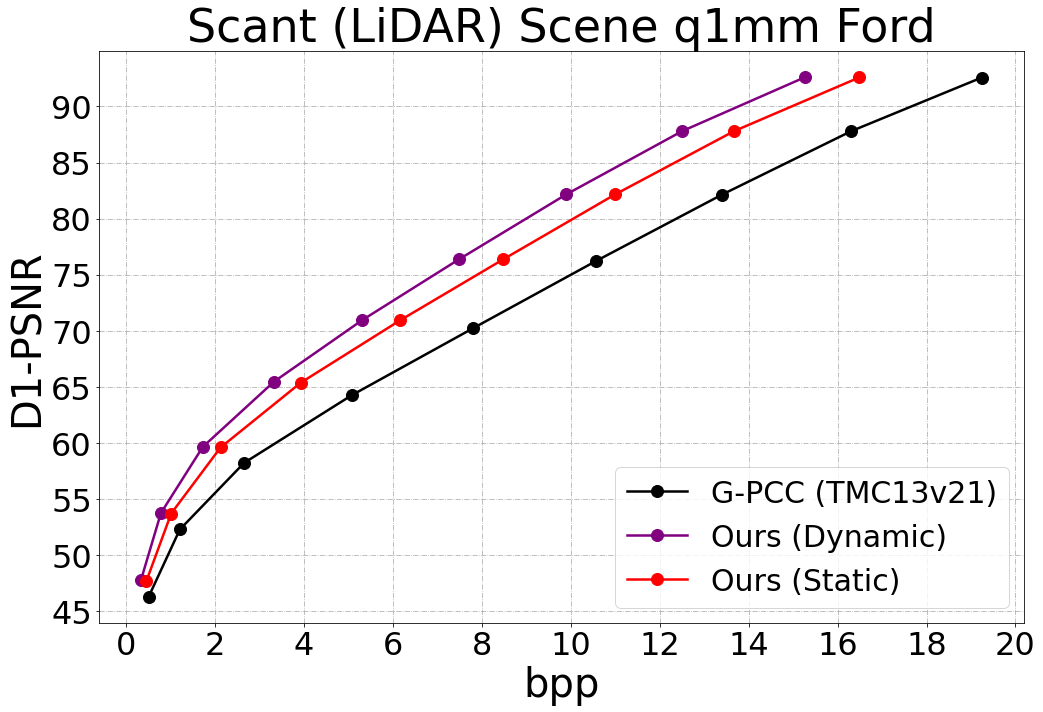

In [39]:
if ylabel=='mseF,PSNR (p2point)': ylabelname = 'D1-PSNR'
if ylabel=='mseF,PSNR (p2plane)': ylabelname = 'D2-PSNR'

linestyle='solid'

# title = title + '  '+ylabel
fig, ax = plt.subplots(figsize=(7.3*2,5*2))
prefix = ' '


plt.plot(gpcc[0][1:], gpcc[1][1:], 
         label='G-PCC (TMC13v21)', 
         color='black', marker='o', linestyle=linestyle, linewidth=2.5, markersize=12)


plt.plot(inter[0][1:], inter[1][1:], 
         label='Ours (Dynamic)', 
         color='purple', marker='o', linestyle=linestyle, linewidth=2.5, markersize=12)

plt.plot(intra[0][1:], intra[1][1:], 
         label='Ours (Static)', 
         color='red', marker='o', linestyle=linestyle, linewidth=2.5, markersize=12)

ax.locator_params(axis='x', nbins=12)
ax.locator_params(axis='y', nbins=12)
plt.tick_params(labelsize=32)
plt.xlabel(xlabel, fontdict={'size':40})
plt.ylabel(ylabelname, fontdict={'size':40})

plt.title(title, fontdict={'size':46})
plt.grid(ls='-.')
plt.legend(loc='lower right', ncol=1, prop={'size':30})


fig.tight_layout()
os.makedirs('figs/lidar', exist_ok=True)
# fig.savefig( os.path.join('figs', title+'.png'))
fig.savefig( os.path.join('figs/lidar', title+'_'+ylabelname+'.pdf'))
